In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

cols_storm = ['event_id', 'event_type', 'class_type', 'kp_index']
cols_cmd = ['event_id', 'speed', 'half_angle', 'latitude', 'longitude', 'speed_category', 'potentially_geoeffective']

df_storm = pd.read_csv('_geomagnetic_storms.csv', usecols=cols_storm)
df_cmd = pd.read_csv('_cme_events_2year.csv', usecols=cols_cmd)

df_cmd['event_type'] = 'CMD'

#시간 변환
df_storm['event_id'] = df_storm['event_id'].str[:19]
df_storm['event_id'] = pd.to_datetime(df_storm['event_id'])
df_storm['year_month'] = df_storm['event_id'].dt.to_period('M')
df_storm['year_month_day'] = df_storm['event_id'].dt.to_period('D')

df_cmd['event_id'] = df_cmd['event_id'].str[:19]
df_cmd['event_id'] = pd.to_datetime(df_cmd['event_id'])
df_cmd['year_month'] = df_cmd['event_id'].dt.to_period('M')
df_cmd['year_month_day'] = df_cmd['event_id'].dt.to_period('D')

In [2]:
df_cmd.head()

,event_id,speed,half_angle,latitude,longitude,speed_category,potentially_geoeffective,event_type,year_month,year_month_day
0,2023-07-26 11:12:00,345.0,10.0,6.0,78.0,Normal,False,CMD,2023-07,2023-07-26
1,2023-07-27 21:36:00,680.0,51.0,16.0,-110.0,Fast,False,CMD,2023-07,2023-07-27
2,2023-07-27 23:24:00,590.0,31.0,-25.0,-75.0,Fast,False,CMD,2023-07,2023-07-27
3,2023-07-28 15:53:00,2000.0,43.0,40.0,110.0,Extreme,True,CMD,2023-07,2023-07-28
4,2023-07-28 22:36:00,589.0,42.0,-3.0,-27.0,Fast,False,CMD,2023-07,2023-07-28


In [6]:
df_storm.head()

,event_id,event_type,class_type,kp_index,year_month,year_month_day
0,2023-08-05 03:00:00,Geomagnetic Storm,G0,6.67,2023-08,2023-08-05
1,2023-09-03 00:00:00,Geomagnetic Storm,G0,5.67,2023-09,2023-09-03
2,2023-09-12 15:00:00,Geomagnetic Storm,G0,5.67,2023-09,2023-09-12
3,2023-09-19 00:00:00,Geomagnetic Storm,G0,5.67,2023-09,2023-09-19
4,2023-09-24 18:00:00,Geomagnetic Storm,G0,5.67,2023-09,2023-09-24


In [7]:
df_storm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        41 non-null     datetime64[ns]
 1   event_type      41 non-null     object        
 2   class_type      41 non-null     object        
 3   kp_index        41 non-null     float64       
 4   year_month      41 non-null     period[M]     
 5   year_month_day  41 non-null     period[D]     
dtypes: datetime64[ns](1), float64(1), object(2), period[D](1), period[M](1)
memory usage: 2.1+ KB


In [9]:
df_cmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   event_id                  2851 non-null   datetime64[ns]
 1   speed                     2851 non-null   float64       
 2   half_angle                2851 non-null   float64       
 3   latitude                  2851 non-null   float64       
 4   longitude                 2851 non-null   float64       
 5   speed_category            2851 non-null   object        
 6   potentially_geoeffective  2851 non-null   bool          
 7   event_type                2851 non-null   object        
 8   year_month                2851 non-null   period[M]     
 9   year_month_day            2851 non-null   period[D]     
dtypes: bool(1), datetime64[ns](1), float64(4), object(2), period[D](1), period[M](1)
memory usage: 203.4+ KB


In [8]:
#코로나 질량 방출 데이터 기간, 지자기 방출 데이터 기간
print(f"CMD Date range: {df_cmd['event_id'].min()} to {df_cmd['event_id'].max()}")
print(f"Geomagnetic Storm Date range: {df_storm['event_id'].min()} to {df_storm['event_id'].max()}")

CMD Date range: 2023-07-26 11:12:00 to 2025-07-14 19:38:00
Geomagnetic Storm Date range: 2023-08-05 03:00:00 to 2025-06-13 00:00:00


In [10]:
#코로나 질량 방출이 지구에 잠재적 위험을 가진 데이터
print((df_cmd['potentially_geoeffective'] == 1).sum())

456


In [29]:
df_unit = pd.concat([df_cmd, df_storm])
df_unit = df_unit.drop(columns=['speed', 'half_angle', 'latitude', 'longitude', 'speed_category', 'potentially_geoeffective', 'kp_index', 'class_type'])
df_unit.head()

,event_id,event_type,year_month,year_month_day,latitude_group
0,2023-07-26 11:12:00,CMD,2023-07,2023-07-26,"(0, 30]"
1,2023-07-27 21:36:00,CMD,2023-07,2023-07-27,"(0, 30]"
2,2023-07-27 23:24:00,CMD,2023-07,2023-07-27,"(-30, 0]"
3,2023-07-28 15:53:00,CMD,2023-07,2023-07-28,"(30, 60]"
4,2023-07-28 22:36:00,CMD,2023-07,2023-07-28,"(-30, 0]"


<Figure size 1500x800 with 0 Axes>

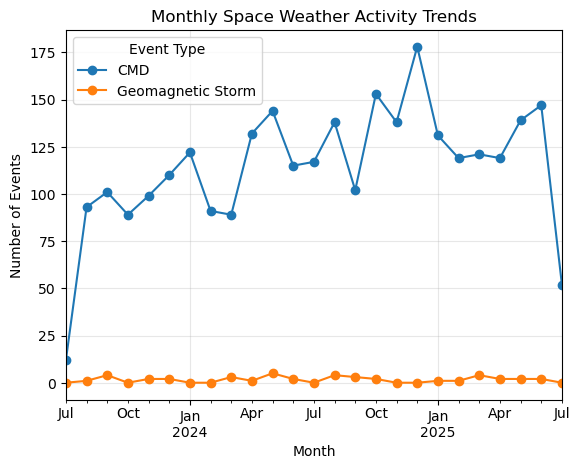

In [5]:
monthly_counts = df_unit.groupby(['year_month', 'event_type']).size().unstack(fill_value=0)
plt.figure(figsize=(15, 8))
monthly_counts.plot(kind='line', marker='o')

plt.title('Monthly Space Weather Activity Trends')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.legend(title='Event Type')
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
#코로나 질량 방출과 지자기 폭풍의 하루 단위 횟수 상관 계수
event_daily = df_unit.groupby(['year_month_day', 'event_type']).size().unstack(fill_value=0)
correlation_matrix = event_daily.corr()
print(f"CME와 지자기 폭풍 발생 횟수 하루 단위 상관계수: {correlation_matrix.iloc[0, 1]:.4f}")

#코로나 질량 방출과 지자기 폭풍의 달 단위 횟수 상관계수
event_month = df_unit.groupby(['year_month', 'event_type']).size().unstack(fill_value=0)
correlation_matrix = event_month.corr()
print(f"CME와 지자기 폭풍 발생 횟수 달 단위 상관계수: {correlation_matrix.iloc[0, 1]:.4f}")

CME와 지자기 폭풍 발생 횟수 하루 단위 상관계수: 0.0083
CME와 지자기 폭풍 발생 횟수 달 단위 상관계수: 0.2407


In [39]:
df_cmd['geo_numberr'] = df_cmd['potentially_geoeffective'].astype(int)
cols_to_check = ['speed', 'half_angle', 'latitude', 'longitude', 'geo_numberr']
print('\n속도, 반 각, 위도, 경도 상관계수\n')
print(df_cmd[cols_to_check].corr()['geo_numberr'])
print('\n')


속도, 반 각, 위도, 경도 상관계수

speed          0.765253
half_angle     0.134717
latitude      -0.017450
longitude      0.018500
geo_numberr    1.000000
Name: geo_numberr, dtype: float64




In [66]:
my_order = ['Slow', 'Normal', 'Fast', 'Very Fast','Extreme']
print(df_cmd['speed_category'].value_counts().reindex(my_order))
print('\n')

bins = [0, 299, 499, 999, 1999, 3600] 
print(pd.cut(df_cmd['speed'], bins=bins).value_counts().sort_index())

speed_category
Slow          276
Normal       1130
Fast         1225
Very Fast     209
Extreme        11
Name: count, dtype: int64


speed
(0, 299]         276
(299, 499]      1130
(499, 999]      1225
(999, 1999]      209
(1999, 3600]      11
Name: count, dtype: int64


1. CME 속도에 따른 지구의 잠재적 위험 분석
                                 mean         std  count
potentially_geoeffective                                
False                      473.510647  146.827444   2395
True                      1085.333333  331.017922    456




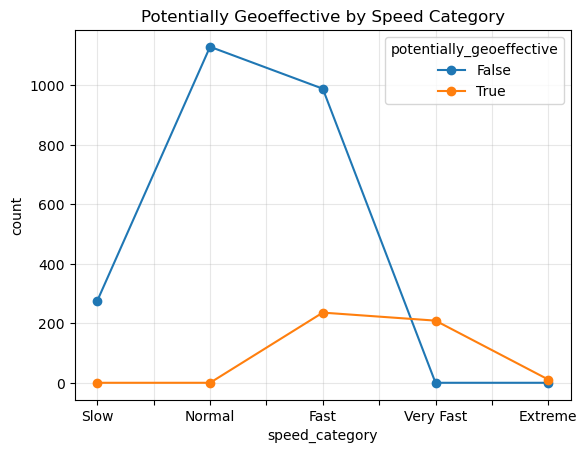

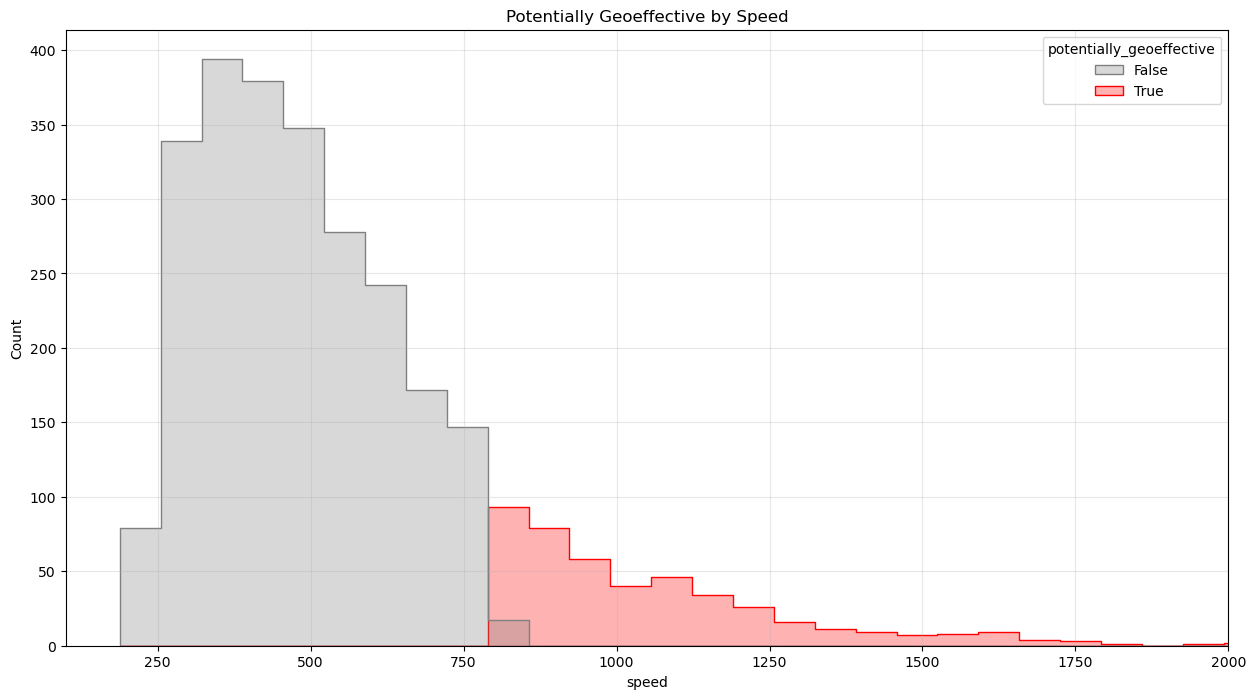

In [8]:
print("1. CME 속도에 따른 지구의 잠재적 위험 분석")
speed_analysis = df_cmd.groupby('potentially_geoeffective')['speed'].agg(['mean', 'std', 'count'])
print(speed_analysis)
print('\n')

my_order = ['Slow', 'Normal', 'Fast', 'Very Fast','Extreme']
geoeffective_counts = df_cmd.groupby(['speed_category', 'potentially_geoeffective']).size().unstack(fill_value=0)
geoeffective_counts = geoeffective_counts.reindex(my_order)
geoeffective_counts.plot(kind='line', marker='o')
plt.title('Potentially Geoeffective by Speed Category')
plt.ylabel('count')
plt.grid(True, alpha=0.3)

plt.figure(figsize=(15, 8))
sns.histplot(data=df_cmd, 
             x='speed', 
             hue='potentially_geoeffective', 
             element='step', 
             fill=True, 
             alpha=0.3, 
             bins=50, 
             palette=['gray', 'red'])
plt.title('Potentially Geoeffective by Speed')
plt.xlim(100, 2000) # 이상치가 너무 멀리 있으면 그래프가 안 보이니 범위 제한
plt.grid(True, alpha=0.3)
plt.show()

2. CME 반각(너비)에 따른 지구의 잠재적 위험 분석(비율)
주의: 극단적인 각도 구간 데이터 표본 수 적어서 비율이 과장되어 보일 수 있음


potentially_geoeffective과 half_angle
                               mean   min   max  count
potentially_geoeffective                              
False                     24.389979  10.0  57.0   2395
True                      28.350877  10.0  60.0    456


각도 구간별 위험 확률 분석
             Total_Events (n)  Danger_Events  Probability  Probability (%)
angle_group                                                               
(0, 10]                   305             49     0.160656        16.065574
(10, 20]                  805            106     0.131677        13.167702
(20, 30]                  879            105     0.119454        11.945392
(30, 40]                  566             86     0.151943        15.194346
(40, 50]                  280             97     0.346429        34.642857
(50, 60]                   16             13     0.812500        81.250000




C:\Users\mgang\AppData\Local\Temp\ipykernel_14540\3422999884.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis_table = df_cmd.groupby('angle_group')['potentially_geoeffective'].agg(['count', 'sum', 'mean'])


Text(0.5, 1.0, 'Probability of Potential Geoeffectiveness by Half Angle')

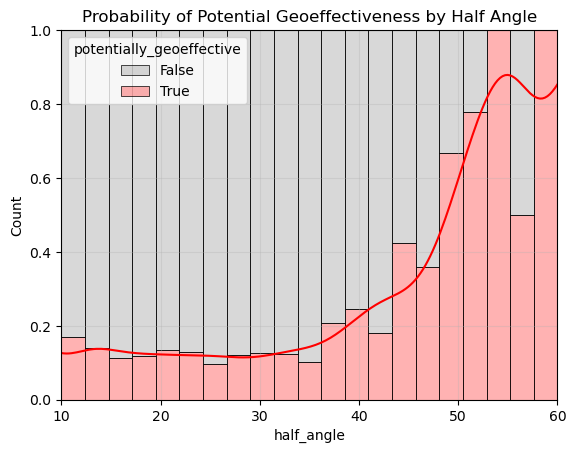

In [47]:
angle_analysis = df_cmd.groupby('potentially_geoeffective')['half_angle'].agg(['mean', 'min', 'max', 'count'])

print("2. CME 반각(너비)에 따른 지구의 잠재적 위험 분석(비율)")
print('주의: 극단적인 각도 구간 데이터 표본 수 적어서 비율이 과장되어 보일 수 있음')
print('\n')

print('potentially_geoeffective과 half_angle')
print(angle_analysis)
print('\n')

df_cmd['angle_group'] = pd.cut(df_cmd['half_angle'], bins=[0, 10, 20, 30, 40, 50, 60])
analysis_table = df_cmd.groupby('angle_group')['potentially_geoeffective'].agg(['count', 'sum', 'mean'])
analysis_table.columns = ['Total_Events (n)', 'Danger_Events', 'Probability']
analysis_table['Probability (%)'] = analysis_table['Probability'] * 100

print("각도 구간별 위험 확률 분석")
print(analysis_table)
print('\n')

sns.histplot(data=df_cmd, 
             x='half_angle', 
             hue='potentially_geoeffective', 
             multiple='fill', 
             kde=True, 
             element='bars', 
             alpha=0.3, 
             palette=['gray', 'red'],
             edgecolor='black', 
             linewidth=0.5)

plt.grid(True, alpha=0.3)
plt.title('Probability of Potential Geoeffectiveness by Half Angle')

3. 발생 경도(Longitude)에 따른 지구의 잠재적 위험 분석(낮을수록 정면)
                              mean        std  count
potentially_geoeffective                            
False                     2.633820  78.124453   2395
True                      6.697368  92.139601    456


경도 구간별 위험 확률 분석
                 Total_Events (n)  Danger_Events  Probability  Probability (%)
longitude_group                                                               
(-180, -150]                   78             19     0.243590        24.358974
(-150, -100]                  234             39     0.166667        16.666667
(-100, -50]                   463             89     0.192225        19.222462
(-50, 0]                      910             93     0.102198        10.219780
(0, 50]                       297             53     0.178451        17.845118
(50, 100]                     518             75     0.144788        14.478764
(100, 150]                    275             61     0.221818        22.181818
(150, 180]  

C:\Users\mgang\AppData\Local\Temp\ipykernel_14540\1378575601.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis_table = df_cmd.groupby('longitude_group')['potentially_geoeffective'].agg(['count', 'sum', 'mean'])


Text(0.5, 1.0, 'Probability of Potential Geoeffectiveness by Longitude')

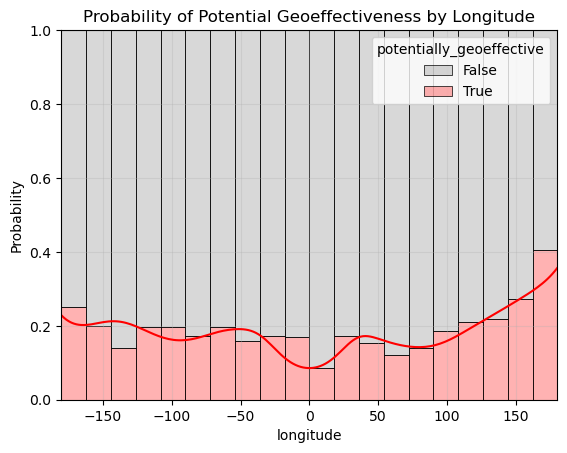

In [46]:
print("3. 발생 경도(Longitude)에 따른 지구의 잠재적 위험 분석(낮을수록 정면)")
lon_analysis = df_cmd.groupby('potentially_geoeffective')['longitude'].agg(['mean', 'std', 'count'])
print(lon_analysis)
print('\n')

df_cmd['longitude_group'] = pd.cut(df_cmd['longitude'], bins=[-180, -150, -100, -50, 0, 50, 100, 150, 180])
analysis_table = df_cmd.groupby('longitude_group')['potentially_geoeffective'].agg(['count', 'sum', 'mean'])
analysis_table.columns = ['Total_Events (n)', 'Danger_Events', 'Probability']
analysis_table['Probability (%)'] = analysis_table['Probability'] * 100

print("경도 구간별 위험 확률 분석")
print(analysis_table)
print('\n')

sns.histplot(data=df_cmd, 
             x='longitude', 
             hue='potentially_geoeffective', 
             multiple='fill',
             kde=True, 
             element='bars', 
             alpha=0.3, 
             palette=['gray', 'red'],
             stat='probability',
             edgecolor='black', 
             linewidth=0.5)

plt.grid(True, alpha=0.3)
plt.title('Probability of Potential Geoeffectiveness by Longitude')

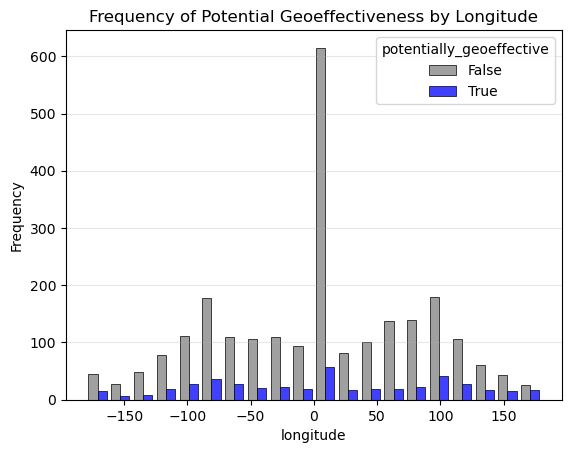

In [20]:
sns.histplot(data=df_cmd, 
             x='longitude', 
             hue='potentially_geoeffective', 
             multiple='dodge',   
             shrink=0.8,         
             palette=['gray', 'blue'],
             edgecolor='black', 
             linewidth=0.5)

plt.grid(True, axis='y', alpha=0.3)
plt.title('Frequency of Potential Geoeffectiveness by Longitude')
plt.ylabel('Frequency')

plt.show()

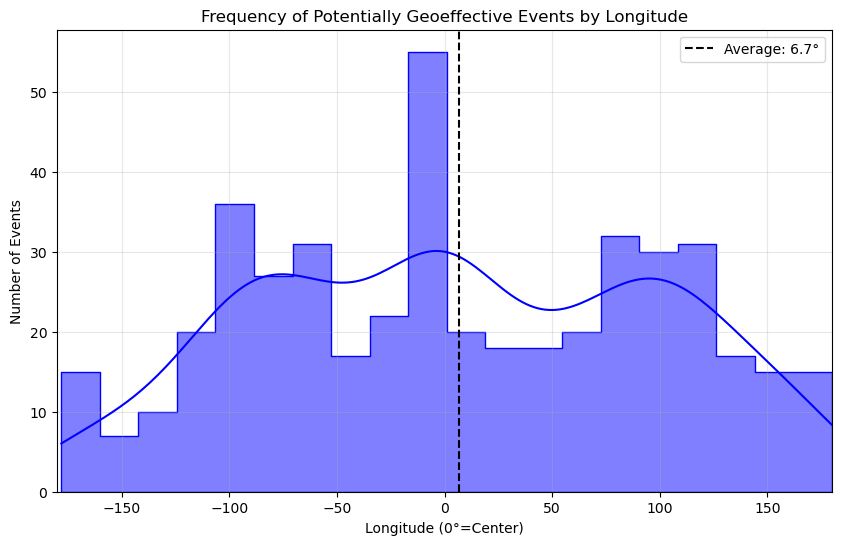

In [21]:
#바로 위, 바 그래프에서 잠재적 위험이 1인 데이터만 히스토그램으로 분석한 그프프
geoeffective_events = df_cmd[df_cmd['potentially_geoeffective'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(data=geoeffective_events, 
             x='longitude', 
             kde=True, 
             element='step', 
             bins=20, 
             color='blue', 
             alpha=0.5)

plt.title('Frequency of Potentially Geoeffective Events by Longitude')
plt.xlabel('Longitude (0°=Center)')
plt.ylabel('Number of Events')
plt.xlim(-180, 180)
plt.grid(True, alpha=0.3)

mean_val = geoeffective_events['longitude'].mean()
plt.axvline(mean_val, 
            color='black', 
            linestyle='--', 
            label=f'Average: {mean_val:.1f}°')
plt.legend()
plt.show()

4. 발생 위도(Latitude)에 따른 지구의 잠재적 위험 분석
                              mean        std  count
potentially_geoeffective                            
False                    -3.019624  38.594436   2395
True                     -4.798246  30.118354    456


위도 구간별 위험 확률 분석
                Total_Events (n)  latitude_group  Probability  Probability (%)
latitude_group                                                                
(-90, -60]                   197              15     0.076142         7.614213
(-60, -30]                   534              80     0.149813        14.981273
(-30, 0]                     834             159     0.190647        19.064748
(0, 30]                      719             149     0.207232        20.723227
(30, 60]                     427              44     0.103044        10.304450
(60, 90]                     138               9     0.065217         6.521739




C:\Users\mgang\AppData\Local\Temp\ipykernel_12260\466197675.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis_table = df_cmd.groupby('latitude_group')['potentially_geoeffective'].agg(['count', 'sum', 'mean'])


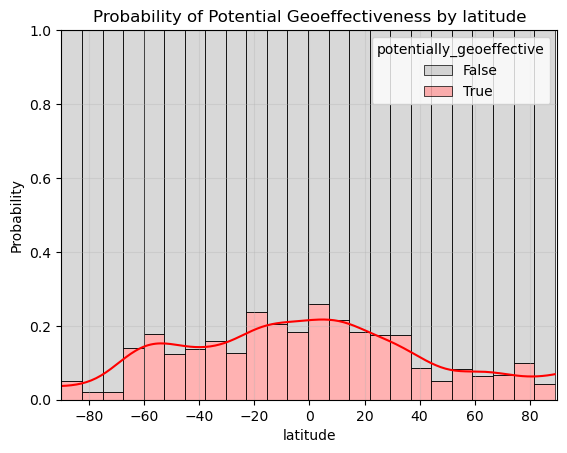

In [14]:
print("4. 발생 위도(Latitude)에 따른 지구의 잠재적 위험 분석")
lon_analysis = df_cmd.groupby('potentially_geoeffective')['latitude'].agg(['mean', 'std', 'count'])
print(lon_analysis)
print('\n')

df_cmd['latitude_group'] = pd.cut(df_cmd['latitude'], bins=[-90, -60, -30, 0, 30, 60, 90])

analysis_table = df_cmd.groupby('latitude_group')['potentially_geoeffective'].agg(['count', 'sum', 'mean'])
analysis_table.columns = ['Total_Events (n)', 'latitude_group', 'Probability']
analysis_table['Probability (%)'] = analysis_table['Probability'] * 100

print("위도 구간별 위험 확률 분석")
print(analysis_table)
print('\n')

sns.histplot(
    data=df_cmd, 
    x='latitude', 
    hue='potentially_geoeffective',  
    kde=True, 
    multiple='fill',       
    element='bars',        
    alpha=0.3, 
    palette=['gray', 'red'],
    stat='probability',
    edgecolor='black', 
    linewidth=0.5)

plt.xlim(-90, 90) 
plt.grid(True, alpha=0.3)
plt.title('Probability of Potential Geoeffectiveness by latitude')
plt.show()

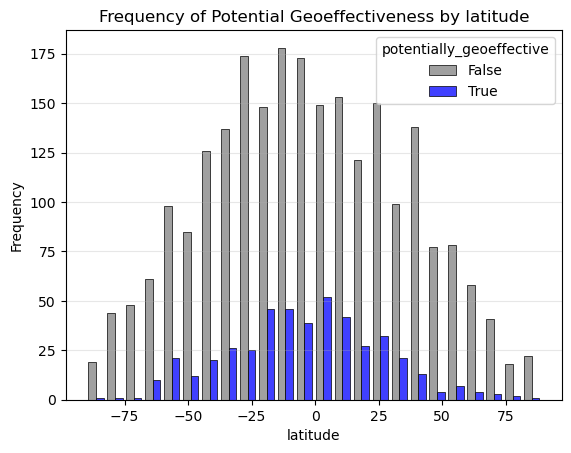

In [22]:
sns.histplot(data=df_cmd, 
             x='latitude', 
             hue='potentially_geoeffective', 
             multiple='dodge',   
             shrink=0.8,         
             palette=['gray', 'blue'],
             edgecolor='black', 
             linewidth=0.5)

plt.grid(True, axis='y', alpha=0.3)
plt.title('Frequency of Potential Geoeffectiveness by latitude')
plt.ylabel('Frequency')

plt.show()

지구 잠재적 위험 데이터 개수: 456개


위험 그룹의 속도 통계 (Speed Statistics)
count     456.000000
mean     1085.333333
std       331.017922
min       801.000000
25%       873.250000
50%       985.500000
75%      1176.250000
max      3529.000000
Name: speed, dtype: float64




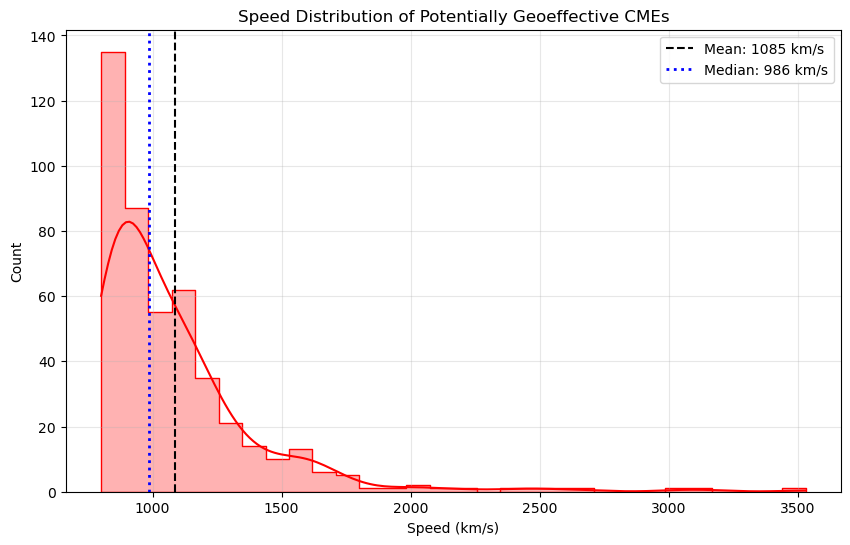

In [81]:
danger_group = df_cmd[df_cmd['potentially_geoeffective'] == 1]

print(f"지구 잠재적 위험 데이터 개수: {len(danger_group)}개")
print('\n')

print("위험 그룹의 속도 통계 (Speed Statistics)")
stats = danger_group['speed'].describe()
print(stats)
print('\n')

plt.figure(figsize=(10, 6))
sns.histplot(data=danger_group, 
             x='speed', 
             kde=True, 
             color='red', 
             element='step', 
             alpha=0.3, 
             bins=30)

mean_speed = danger_group['speed'].mean()
median_speed = danger_group['speed'].median()

plt.axvline(mean_speed, 
            color='black', 
            linestyle='--', 
            label=f'Mean: {mean_speed:.0f} km/s')

plt.axvline(median_speed, 
            color='blue', 
            linestyle=':', 
            linewidth=2, 
            label=f'Median: {median_speed:.0f} km/s')

plt.title('Speed Distribution of Potentially Geoeffective CMEs')
plt.xlabel('Speed (km/s)')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

속도 1000km/s 이하인 위험군 데이터 개수: 238개
전체 위험군 중 차지하는 비율: 52.2%
전체 중 차지하는 비율: 8.3%


중저속 위험군(<= 1000)
count     238.000000
mean      884.920168
std        57.149278
min       801.000000
25%       835.000000
50%       879.500000
75%       929.750000
max      1000.000000
Name: speed, dtype: float64




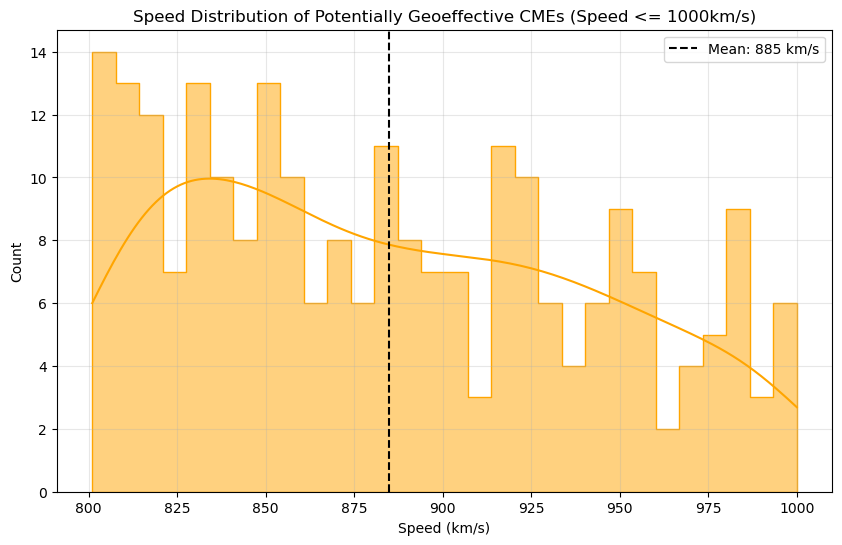

In [79]:
low_speed_danger = df_cmd[(df_cmd['potentially_geoeffective'] == 1) & (df_cmd['speed'] <= 1000)]

print(f"속도 1000km/s 이하인 위험군 데이터 개수: {len(low_speed_danger)}개")
print(f"전체 위험군 중 차지하는 비율: {len(low_speed_danger) / len(df_cmd[df_cmd['potentially_geoeffective']==1]) * 100:.1f}%")
print(f"전체 중 차지하는 비율: {len(low_speed_danger) / len(df_cmd['potentially_geoeffective']) * 100:.1f}%")
print('\n')

print("중저속 위험군(<= 1000)")
print(low_speed_danger['speed'].describe())
print('\n')

plt.figure(figsize=(10, 6))
sns.histplot(data=low_speed_danger, 
             x='speed', 
             kde=True,           
             color='orange',  
             element='step',
             bins=30)

plt.title('Speed Distribution of Potentially Geoeffective CMEs (Speed <= 1000km/s)')
plt.xlabel('Speed (km/s)')
plt.ylabel('Count')

mean_val = low_speed_danger['speed'].mean()
plt.axvline(mean_val, color='black', linestyle='--', label=f'Mean: {mean_val:.0f} km/s')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



모델 정확도: 99.42%


(기본 위험도) Intercept   -6.544491
dtype: float64


요소별 중요도 (절대값 클수록 영향력 큼)
speed         8.597013
longitude     0.022503
latitude     -0.015796
half_angle   -0.110927
dtype: float64




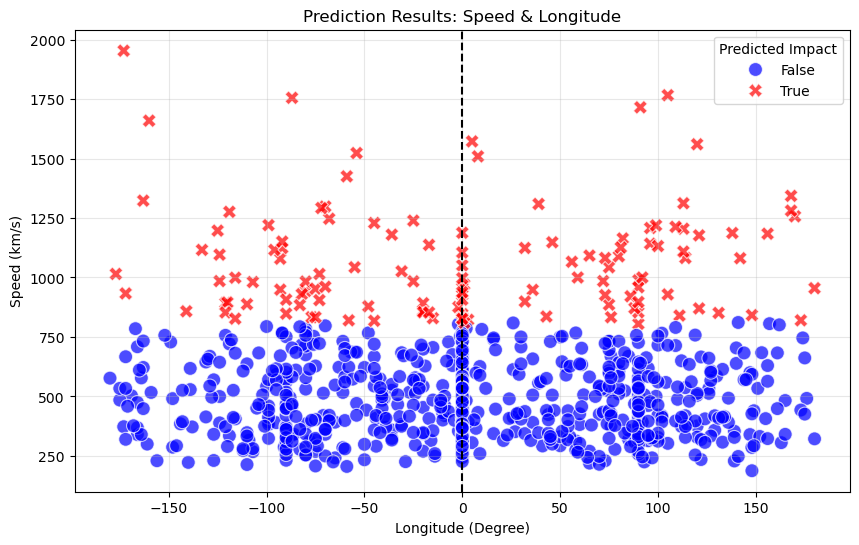

In [80]:
#정규화 버전
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

ml_df = df_cmd.copy()
features = ['speed', 'half_angle', 'longitude', 'latitude']
target = 'potentially_geoeffective'

X = ml_df[features]
y = ml_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#비율로 변환 (스케일링)
scaler = StandardScaler()

#학습 데이터로 '기준(평균, 표준편차)'을 잡고 변환
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#모델 학습 & 평가
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_hat = model.predict(X_test_scaled)
print('\n')
accuracy = accuracy_score(y_test, y_hat)
print(f"모델 정확도: {accuracy * 100:.2f}%")
print('\n')

#중요도 분석 (가중치)
coef = pd.Series(model.coef_[0], index=features)
intercept = pd.Series([model.intercept_[0]], index=['Intercept'])
print('(기본 위험도)', intercept.sort_values(ascending=False))
print('\n')

print("요소별 중요도 (절대값 클수록 영향력 큼)")
print(coef.sort_values(ascending=False))
print('\n')
#시각화
plt.figure(figsize=(10, 6))

test_longitude = ml_df.loc[X_test.index, 'longitude']
test_speed = ml_df.loc[X_test.index, 'speed']

sns.scatterplot(x=test_longitude, 
                y=test_speed, 
                hue=y_hat, 
                palette={0: 'blue', 1: 'red'}, 
                style=y_hat, 
                s=100, 
                alpha=0.7)

plt.title('Prediction Results: Speed & Longitude')
plt.xlabel('Longitude (Degree)')
plt.ylabel('Speed (km/s)')
plt.grid(True, alpha=0.3)
plt.legend(title='Predicted Impact')
plt.axvline(0, color='black', linestyle='--') 
plt.show()

y_test의 정답 분포:
potentially_geoeffective
False    722
True     134
Name: count, dtype: int64


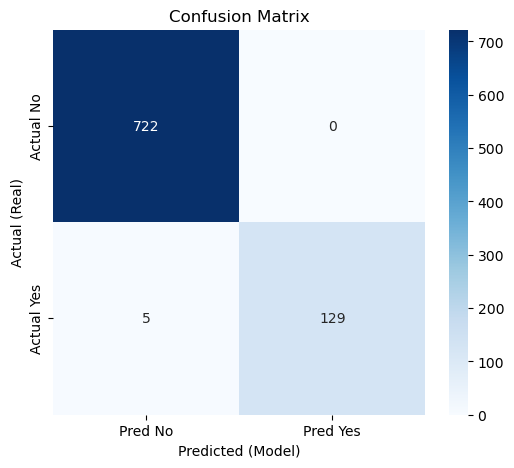

혼동 행렬의 정밀도 1.0000, 재현율 0.9627, F1 지표 0.9810



In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("y_test의 정답 분포:")
print(y_test.value_counts())

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_hat)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred No', 'Pred Yes'], 
            yticklabels=['Actual No', 'Actual Yes'])

plt.title('Confusion Matrix')
plt.ylabel('Actual (Real)')
plt.xlabel('Predicted (Model)')
plt.show()

tn, fp, fn, tp = cm.ravel()

# 정밀도 = TP / (TP + FP)
precision = precision_score(y_test, y_hat) 
# 재현율 = TP / (TP + FN)
recall = recall_score(y_test, y_hat)
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_hat)

print(f"혼동 행렬의 정밀도 {precision:.4f}, 재현율 {recall:.4f}, F1 지표 {f1:.4f}\n")

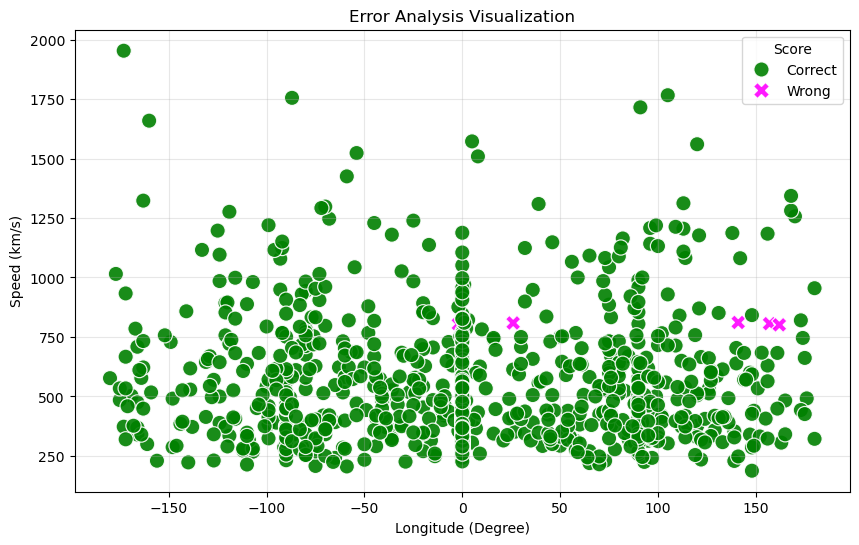

In [78]:
vis_df = ml_df.loc[X_test.index].copy()
vis_df['Actual'] = y_test        
vis_df['Predicted'] = y_hat

vis_df['Score'] = vis_df.apply(lambda row: 'Correct' if row['Actual'] == row['Predicted'] else 'Wrong', axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='speed', 
                hue='Score', style='Score',
                data=vis_df,
                palette={'Correct': 'green', 'Wrong': 'magenta'},
                markers={'Correct': 'o', 'Wrong': 'X'},
                s=120, alpha=0.9)
plt.title('Error Analysis Visualization')
plt.xlabel('Longitude (Degree)')
plt.ylabel('Speed (km/s)')
plt.grid(True, alpha=0.3)
plt.show()

NASA Space Weather Events Dataset (2025). Collected from NASA DONKI API. 